# Problem Statement: Prediciting Used Car Price
Dataset Link: https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes

# Understanding the Data

In [13]:
# Import all the required packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [14]:
%matplotlib inline

In [2]:
# Check all the input files
for dirname, _, filenames in os.walk('./input'):
    print('Files Names List:')
    for filename in filenames:
        print(os.path.join(dirname, filename))

Files Names List:
./input\audi.csv
./input\bmw.csv
./input\cclass.csv
./input\focus.csv
./input\ford.csv
./input\hyundi.csv
./input\merc.csv
./input\skoda.csv
./input\toyota.csv
./input\unclean cclass.csv
./input\unclean focus.csv
./input\vauxhall.csv
./input\vw.csv


In [3]:
# Read the hyundai file and rename the tax column
df_hyundai = pd.read_csv('./input/hyundi.csv')
df_hyundai = df_hyundai.rename(columns={'tax(£)': 'tax'})
print(df_hyundai.shape)
df_hyundai.head()

(4860, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [4]:
# Read all the files and combine the dataset
files = [file for file in os.listdir('./input/')]
df = pd.DataFrame()

for file in files:
    if file in ['hyundi.csv', 'unclean focus.csv', 'unclean cclass.csv']:
        continue
    data_frame = pd.read_csv(f'./input/{file}')
    df = pd.concat([df, data_frame])

df = pd.concat([df, df_hyundai])
print(df.shape)
df.head()

(108540, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0


In [5]:
# Remove missing 9353 rows
print(df.isnull().sum())
print('\nRemoving the missing 9353 rows since the dataset size is 108540 rows\n')
df = df.dropna()
print(df.shape)
print(df.head())

model              0
year               0
price              0
transmission       0
mileage            0
fuelType           0
tax             9353
mpg             9353
engineSize         0
dtype: int64

Removing the missing 9353 rows since the dataset size is 108540 rows

(99187, 9)
  model  year  price transmission  mileage fuelType    tax   mpg  engineSize
0    A1  2017  12500       Manual    15735   Petrol  150.0  55.4         1.4
1    A6  2016  16500    Automatic    36203   Diesel   20.0  64.2         2.0
2    A1  2016  11000       Manual    29946   Petrol   30.0  55.4         1.4
3    A4  2017  16800    Automatic    25952   Diesel  145.0  67.3         2.0
4    A3  2019  17300       Manual     1998   Petrol  145.0  49.6         1.0


In [6]:
# Check different columns in the dataset
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [7]:
# Check the datatypes in the dataset corresponding to each columns
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
dtype: object

In [8]:
df.describe(include='all')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,99187,99187.000000,99187.000000,99187,99187.000000,99187,99187.000000,99187.000000,99187.000000
unique,195,NaN,NaN,4,NaN,5,NaN,NaN,NaN
top,Fiesta,NaN,NaN,Manual,NaN,Petrol,NaN,NaN,NaN
freq,6557,NaN,NaN,56445,NaN,54928,NaN,NaN,NaN
mean,NaN,2017.087723,16805.347656,NaN,23058.914213,NaN,120.299838,55.166825,1.663280
std,NaN,2.123934,9866.773417,NaN,21148.523721,NaN,63.150926,16.138522,0.557646
min,NaN,1970.000000,450.000000,NaN,1.000000,NaN,0.000000,0.300000,0.000000
25%,NaN,2016.000000,9999.000000,NaN,7425.000000,NaN,125.000000,47.100000,1.200000
50%,NaN,2017.000000,14495.000000,NaN,17460.000000,NaN,145.000000,54.300000,1.600000
75%,NaN,2019.000000,20870.000000,NaN,32339.000000,NaN,145.000000,62.800000,2.000000


In [9]:
from pandas_profiling import ProfileReport

In [10]:
# profile = ProfileReport(df, title="Used Cars Profiling Report")
# profile.to_file("used_cars_profile.html")

# Exploratory Data Analysis

## Univariate Analysis

In [11]:
# Create two lists for Categorical and Numerical variables. This would be helpful in the next code
cat_variables = ['model', 'transmission', 'fuelType']
num_variables = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
print(f'Categorical Variables: {cat_variables}')
print(f'Numerical Variables: {num_variables}')

Categorical Variables: ['model', 'transmission', 'fuelType']
Numerical Variables: ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']


### Dependent Variable

count     99187.000000
mean      16805.347656
std        9866.773417
min         450.000000
25%        9999.000000
50%       14495.000000
75%       20870.000000
max      159999.000000
Name: price, dtype: float64


C:\Users\Atul\Anaconda3\envs\workspace\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


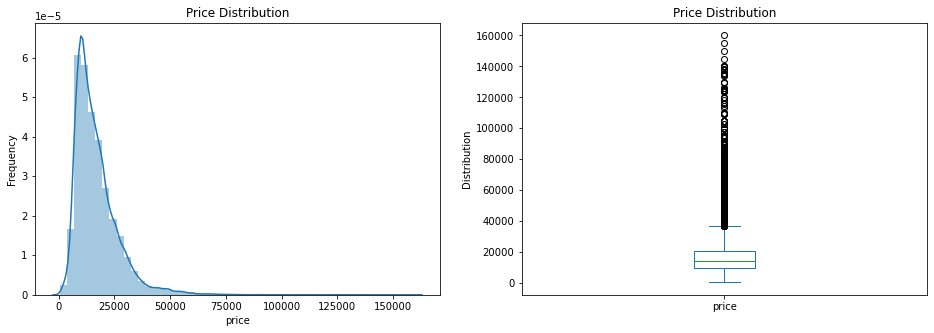

In [15]:
# Price Summary
print(df['price'].describe())

plt.figure(1)

plt.subplot(121)
plt.title('Price Distribution')
sns.distplot(df['price'])
plt.ylabel('Frequency')

plt.subplot(122)
df['price'].plot.box(figsize=(16,5), title = 'Price Distribution')
plt.ylabel('Distribution')

plt.show()

### Independent Variables: Categorical

In [14]:
# Model Summary
for var in cat_variables:
    (df[var].value_counts(normalize=True) * 100).plot.bar(figsize = (8, 5), title = f'{var} Distribution')
    plt.xlabel(f'{var}')
    plt.ylabel('Count')
    print(f'{var} Percentage Distribution:\n', (df[var].value_counts(normalize=True) * 100))

model Percentage Distribution:
  Fiesta     6.610745
 Golf       4.902860
 Focus      4.625606
 C Class    3.777713
 Corsa      3.469205
              ...   
 Escort     0.001008
 Ranger     0.001008
 RS7        0.001008
 A2         0.001008
 Amica      0.001008
Name: model, Length: 195, dtype: float64
transmission Percentage Distribution:
 Manual       56.907659
Semi-Auto    22.862875
Automatic    20.220392
Other         0.009074
Name: transmission, dtype: float64
fuelType Percentage Distribution:
 Petrol      55.378225
Diesel      41.263472
Hybrid       3.103229
Other        0.249025
Electric     0.006049
Name: fuelType, dtype: float64


### Independent Variables: Numerical

In [15]:
for var in num_variables:
    print(df[var].describe())

#     plt.figure(1)

#     plt.subplot(121)
#     plt.title(f'{var} Distribution')
#     sns.distplot(df[var])
#     plt.ylabel('Frequency')

#     plt.subplot(122)
#     df[var].plot.box(figsize=(16,5), title = f'{var} Distribution')
#     plt.ylabel('Distribution')

#     plt.show()

count    99187.000000
mean      2017.087723
std          2.123934
min       1970.000000
25%       2016.000000
50%       2017.000000
75%       2019.000000
max       2060.000000
Name: year, dtype: float64
count     99187.000000
mean      16805.347656
std        9866.773417
min         450.000000
25%        9999.000000
50%       14495.000000
75%       20870.000000
max      159999.000000
Name: price, dtype: float64
count     99187.000000
mean      23058.914213
std       21148.523721
min           1.000000
25%        7425.000000
50%       17460.000000
75%       32339.000000
max      323000.000000
Name: mileage, dtype: float64
count    99187.000000
mean       120.299838
std         63.150926
min          0.000000
25%        125.000000
50%        145.000000
75%        145.000000
max        580.000000
Name: tax, dtype: float64
count    99187.000000
mean        55.166825
std         16.138522
min          0.300000
25%         47.100000
50%         54.300000
75%         62.800000
max        470.

## Significance Tests

In [16]:
df['price']

0       12500
1       16500
2       11000
3       16800
4       17300
        ...  
4855     8680
4856     7830
4857     6830
4858    13994
4859    15999
Name: price, Length: 99187, dtype: int64

                year     price   mileage       tax       mpg  engineSize
year        1.000000  0.490829 -0.738604  0.195693 -0.132791   -0.038576
price       0.490829  1.000000 -0.417954  0.307648 -0.296429    0.638114
mileage    -0.738604 -0.417954  1.000000 -0.220761  0.185657    0.109073
tax         0.195693  0.307648 -0.220761  1.000000 -0.451451    0.278411
mpg        -0.132791 -0.296429  0.185657 -0.451451  1.000000   -0.248210
engineSize -0.038576  0.638114  0.109073  0.278411 -0.248210    1.000000


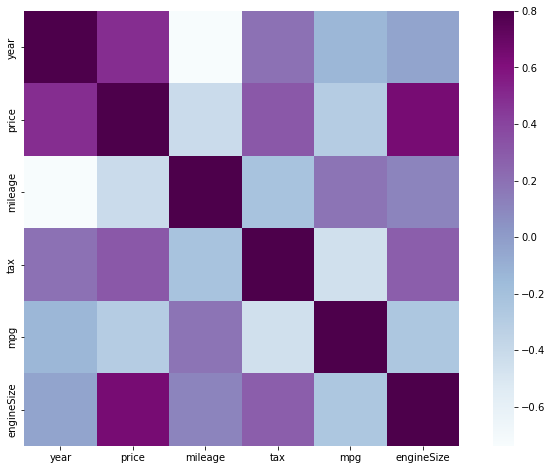

In [16]:
# Using Pearson's Correlation Test for Multicollinearity
mat = df[num_variables].corr()
f, ax = plt.subplots(figsize = (12, 8))
sns.heatmap(mat, vmax = .8, square = True, cmap = 'BuPu');
print(mat)

# Train Test Split

In [18]:
# Separating out the label variable from the concatenated Dataframe for Model Building
X = df[['model', 'year', 'transmission', 'fuelType', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df[['price']]
print(X.shape)

# Converting all the categorical variables to One Hot Enconded variables in the training dataset
X = pd.get_dummies(X)
print(X.shape)
X.head()

(99187, 8)
(99187, 209)


,year,mileage,tax,mpg,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,...,model_230,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15735,150.0,55.4,1.4,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2016,36203,20.0,64.2,2.0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,2016,29946,30.0,55.4,1.4,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2017,25952,145.0,67.3,2.0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,2019,1998,145.0,49.6,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [19]:
# Split the data into Training, Validation and Test datasets
from sklearn.model_selection import train_test_split

# Split the data into 75:25 proportion to get Training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=555)

# Check the dataset size
print('Training independent variable dataset size:', X_train.shape)
print('Training dependent variable dataset size:', y_train.shape)
print('Test independent variable dataset size:', X_test.shape)
print('Test dependent variable dataset size:', y_test.shape)

Training independent variable dataset size: (74390, 209)
Training dependent variable dataset size: (74390, 1)
Test independent variable dataset size: (24797, 209)
Test dependent variable dataset size: (24797, 1)


In [20]:
temp = X_train.iloc[1]
temp.to_csv('temp.csv')

# Model Building

We are going to use below Algorithms to build the Model:

- Linear Regression
- Random Forest
- Gradient Boosting
- Extreme Gradient Boosting
- Support Vector Machines
- Artifical Neural Network

# Linear Regression

In [21]:
lm = LinearRegression()
lm.fit(X_train, y_train)
# calculate predicted values for the test set
yhat_lm = lm.predict(X_test)
# get the RMSE
np.sqrt(mean_squared_error(y_test, yhat_lm))

3754.8964163164164

In [22]:
# saving the model 
import pickle 
pickle_out = open("lm.pkl", mode = "wb") 
pickle.dump(lm, pickle_out) 
pickle_out.close()

In [23]:
from pycaret.regression import *

In [26]:
uc_reg = setup(data = df, target = 'price', session_id=123) 

,Description,Value
0,session_id,123
1,Target,price
2,Original Data,"(99187, 9)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(69430, 207)"


In [27]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1195.0333,4277068.6288,2059.9905,0.9565,0.1088,0.0760,39.0260
rf,Random Forest Regressor,1192.2753,4296245.4341,2065.7585,0.9564,0.1091,0.0757,24.8070
lightgbm,Light Gradient Boosting Machine,1507.8709,5802769.6747,2403.7656,0.9410,0.1286,0.0963,0.4940
dt,Decision Tree Regressor,1474.9033,7020256.9431,2641.6254,0.9286,0.1382,0.0934,0.4750
gbr,Gradient Boosting Regressor,2267.0947,10959550.3981,3309.0207,0.8884,0.1925,0.1534,5.6270
br,Bayesian Ridge,2283.7025,14031526.1697,3739.6706,0.8574,0.3070,0.1795,2.9790
ridge,Ridge Regression,2287.5774,14045096.3306,3741.6041,0.8573,0.3086,0.1798,0.1300
lasso,Lasso Regression,2313.9864,14271169.5218,3771.9321,0.8550,0.3076,0.1816,6.5580
lr,Linear Regression,2357.2726,14540001.7404,3807.1587,0.8522,0.3253,0.1876,1.1210
llar,Lasso Least Angle Regression,2983.6326,20410263.3098,4513.7145,0.7926,0.3316,0.2245,0.1700


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [29]:
uc_rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1190.4076,3671859.9248,1916.2098,0.9621,0.1097,0.0760
1,1210.4737,4770935.0106,2184.2470,0.9563,0.1085,0.0750
2,1185.7301,3798471.2667,1948.9667,0.9594,0.1080,0.0755
3,1172.3643,3829588.4752,1956.9334,0.9602,0.1072,0.0750
4,1179.5428,3844694.2513,1960.7892,0.9591,0.1038,0.0749
5,1208.9628,5475974.7292,2340.0801,0.9457,0.1120,0.0763
6,1179.3703,3977374.3492,1994.3356,0.9595,0.1125,0.0776
7,1194.9974,5790103.3848,2406.2634,0.9438,0.1079,0.0736
8,1198.0801,3744980.2486,1935.1951,0.9618,0.1130,0.0775
9,1202.8237,4058472.7008,2014.5651,0.9562,0.1080,0.0754


In [ ]:
print(uc_rf)

In [ ]:
tuned_rf = tune_model(uc_rf)

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:06:06
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.0min


In [ ]:
print(tuned_rf)